<a href="https://colab.research.google.com/github/eva7wandb/Eva7_Weights_Heist/blob/main/S6/run_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! git clone https://github.com/eva7wandb/Eva7_Weights_Heist

Cloning into 'Eva7_Weights_Heist'...
remote: Enumerating objects: 198, done.
remote: Counting objects: 100% (198/198), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 198 (delta 70), reused 36 (delta 8), pack-reused 0
Receiving objects: 100% (198/198), 1.12 MiB | 6.64 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [12]:
! ls ./Eva7_Weights_Heist/S6

datasets  models  README.md  usage_notebook.ipynb  utils


In [5]:
import sys
sys.path.append('./Eva7_Weights_Heist/S6/')

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

import matplotlib.pyplot as plt
from torchsummary import summary

from utils.general_utils import setup_env
from utils.training import train_model
from utils.testing import test_model
from utils.misclassified import (
    get_incorrect_preds, plot_incorrect_preds
)
from datasets.mnist import MNIST
from models.model import Net

In [7]:
cuda, device = setup_env()
print(cuda, device)

True cuda


In [8]:
## Load Model
train_dataloader, test_dataloader = MNIST(cuda).get_dataloader()

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid poten

In [9]:
## Load Base Model
model_1 = Net(
    batch_norm=True,
    dropout_value=0.01,
).to(device)
summary(model_1, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
        conv_block-5            [-1, 8, 26, 26]               0
            Conv2d-6           [-1, 16, 24, 24]           1,152
              ReLU-7           [-1, 16, 24, 24]               0
       BatchNorm2d-8           [-1, 16, 24, 24]              32
           Dropout-9           [-1, 16, 24, 24]               0
       conv_block-10           [-1, 16, 24, 24]               0
           Conv2d-11            [-1, 8, 24, 24]             128
       conv_block-12            [-1, 8, 24, 24]               0
        MaxPool2d-13            [-1, 8, 12, 12]               0
           Conv2d-14           [-1, 12,

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [10]:
optimizer = optim.SGD(model_1.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=8, gamma=0.01)

logs = []
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_batch_loss, train_batch_acc = train_model(
        model_1, device, train_dataloader, optimizer, epoch
    )
    test_loss, test_acc = test_model(model_1, device, test_dataloader)
    scheduler.step()
    
    logs.append({
        'train_losses': train_batch_loss,
        'test_losses': test_loss,
        'train_acc': train_batch_acc,
        'test_acc': test_acc,
    })

EPOCH: 0


  0%|          | 0/938 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=0.048607904464006424 Batch_id=937 Accuracy=94.64: 100%|██████████| 938/938 [00:26<00:00, 35.15it/s]



Test set: Average loss: 0.0515, Accuracy: 9833/10000 (98.33%)

EPOCH: 1


Loss=0.00896806176751852 Batch_id=937 Accuracy=97.86: 100%|██████████| 938/938 [00:26<00:00, 35.07it/s]



Test set: Average loss: 0.0534, Accuracy: 9829/10000 (98.29%)

EPOCH: 2


Loss=0.05382397025823593 Batch_id=937 Accuracy=98.22: 100%|██████████| 938/938 [00:26<00:00, 35.13it/s]



Test set: Average loss: 0.0433, Accuracy: 9867/10000 (98.67%)

EPOCH: 3


Loss=0.06462964415550232 Batch_id=937 Accuracy=98.55: 100%|██████████| 938/938 [00:26<00:00, 35.17it/s]



Test set: Average loss: 0.0419, Accuracy: 9860/10000 (98.60%)

EPOCH: 4


Loss=0.0019127258565276861 Batch_id=937 Accuracy=98.56: 100%|██████████| 938/938 [00:26<00:00, 35.35it/s]



Test set: Average loss: 0.0303, Accuracy: 9905/10000 (99.05%)

EPOCH: 5


Loss=0.0007856903248466551 Batch_id=937 Accuracy=98.76: 100%|██████████| 938/938 [00:26<00:00, 35.08it/s]



Test set: Average loss: 0.0275, Accuracy: 9907/10000 (99.07%)

EPOCH: 6


Loss=0.08402000367641449 Batch_id=937 Accuracy=98.81: 100%|██████████| 938/938 [00:26<00:00, 35.22it/s]



Test set: Average loss: 0.0320, Accuracy: 9900/10000 (99.00%)

EPOCH: 7


Loss=0.0005946093588136137 Batch_id=937 Accuracy=98.82: 100%|██████████| 938/938 [00:26<00:00, 35.19it/s]



Test set: Average loss: 0.0269, Accuracy: 9917/10000 (99.17%)

EPOCH: 8


Loss=0.010696876794099808 Batch_id=937 Accuracy=99.09: 100%|██████████| 938/938 [00:26<00:00, 35.05it/s]



Test set: Average loss: 0.0220, Accuracy: 9925/10000 (99.25%)

EPOCH: 9


Loss=0.009234458208084106 Batch_id=937 Accuracy=99.15: 100%|██████████| 938/938 [00:26<00:00, 34.85it/s]



Test set: Average loss: 0.0215, Accuracy: 9932/10000 (99.32%)

EPOCH: 10


Loss=0.022256191819906235 Batch_id=937 Accuracy=99.27: 100%|██████████| 938/938 [00:26<00:00, 35.11it/s]



Test set: Average loss: 0.0204, Accuracy: 9938/10000 (99.38%)

EPOCH: 11


Loss=0.0027273413725197315 Batch_id=937 Accuracy=99.25: 100%|██████████| 938/938 [00:26<00:00, 35.37it/s]



Test set: Average loss: 0.0204, Accuracy: 9937/10000 (99.37%)

EPOCH: 12


Loss=0.004460166208446026 Batch_id=937 Accuracy=99.27: 100%|██████████| 938/938 [00:26<00:00, 35.28it/s]



Test set: Average loss: 0.0205, Accuracy: 9939/10000 (99.39%)

EPOCH: 13


Loss=0.016490448266267776 Batch_id=937 Accuracy=99.28: 100%|██████████| 938/938 [00:26<00:00, 34.80it/s]



Test set: Average loss: 0.0199, Accuracy: 9938/10000 (99.38%)

EPOCH: 14


Loss=0.001124134287238121 Batch_id=937 Accuracy=99.28: 100%|██████████| 938/938 [00:27<00:00, 34.70it/s]



Test set: Average loss: 0.0200, Accuracy: 9941/10000 (99.41%)

EPOCH: 15


Loss=0.05465338006615639 Batch_id=937 Accuracy=99.24: 100%|██████████| 938/938 [00:26<00:00, 34.75it/s]



Test set: Average loss: 0.0200, Accuracy: 9940/10000 (99.40%)

EPOCH: 16


Loss=0.03545990213751793 Batch_id=937 Accuracy=99.25: 100%|██████████| 938/938 [00:27<00:00, 34.70it/s]



Test set: Average loss: 0.0200, Accuracy: 9938/10000 (99.38%)

EPOCH: 17


Loss=0.0005008289008401334 Batch_id=937 Accuracy=99.29: 100%|██████████| 938/938 [00:27<00:00, 34.65it/s]



Test set: Average loss: 0.0197, Accuracy: 9940/10000 (99.40%)

EPOCH: 18


Loss=0.005953436251729727 Batch_id=937 Accuracy=99.27: 100%|██████████| 938/938 [00:27<00:00, 34.68it/s]



Test set: Average loss: 0.0206, Accuracy: 9937/10000 (99.37%)

EPOCH: 19


Loss=0.045303650200366974 Batch_id=937 Accuracy=99.23: 100%|██████████| 938/938 [00:27<00:00, 34.63it/s]



Test set: Average loss: 0.0198, Accuracy: 9941/10000 (99.41%)



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Classes in order Actual and Predicted


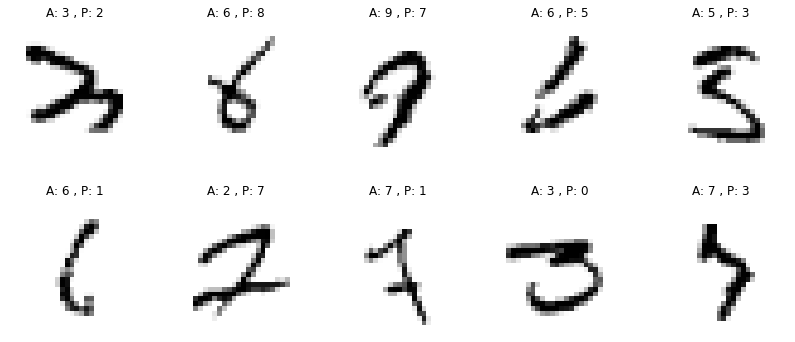

In [16]:
(
    true_wrong, incorrect_examples, pred_wrong
 ) = get_incorrect_preds(model_1, test_dataloader)
plot_incorrect_preds(true_wrong, incorrect_examples, pred_wrong)